In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 1.1. Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import os
import random 
from PIL import Image

In [8]:
# 1.2. Loading the Data Set

IMAGE_FOLDER = r'C:\Users\vraja\Skin cancer ISIC The International Skin Imaging Collaboration\Train'

all_image_data = []

# Use os.walk to search for files in all subfolders
try:
    # root: current path (Train, actinic keratosis, etc.)
    # dirs: List of folders in the current path
    # files: List of files in the current path
    for root, dirs, files in os.walk(IMAGE_FOLDER):
        for file in files:
            if file.endswith('.jpg'):
                class_name = os.path.basename(root) 
                full_path = os.path.join(root, file)
                all_image_data.append({
                    'image_id': file.replace('.jpg', ''),
                    'path': full_path,
                    'class': class_name 
                })
    
    # Create DataFrame
    train_df = pd.DataFrame(all_image_data)
    print("Data frame successfully created from image files.")
    
    # View the first 5 Rows of DataFrame
    
    print(f'{60*'*'}\n\tThe First 5 Rows Of DataFrame\n{60*'*'}')
    print(train_df.head())
    
    # View Total Number of Images
    
    print(f'{60*'*'}\nTotal Number Of Images:{len(train_df)}')

except FileNotFoundError:
    print(f'Error: Path IMAGE_FOLDER not found. Check the path again: {IMAGE_FOLDER}')
except Exception as error:
    print(f'Unspecified error while creating DataFrame: {error}')

Data frame successfully created from image files.
************************************************************
	The First 5 Rows Of DataFrame
************************************************************
       image_id                                               path  \
0  ISIC_0025780  C:\Users\vraja\Skin cancer ISIC The Internatio...   
1  ISIC_0025803  C:\Users\vraja\Skin cancer ISIC The Internatio...   
2  ISIC_0025825  C:\Users\vraja\Skin cancer ISIC The Internatio...   
3  ISIC_0025953  C:\Users\vraja\Skin cancer ISIC The Internatio...   
4  ISIC_0025957  C:\Users\vraja\Skin cancer ISIC The Internatio...   

               class  
0  actinic keratosis  
1  actinic keratosis  
2  actinic keratosis  
3  actinic keratosis  
4  actinic keratosis  
************************************************************
Total Number Of Images:2239


Resolution (Height x Width): 450 x 600
**************************************************
Channel Count Verification: 3 (RGB, 3 channels)
**************************************************
File Size (MB):
  - Minimum: 0.02 MB
  - Maximum: 3.67 MB
  - Average: 0.27 MB


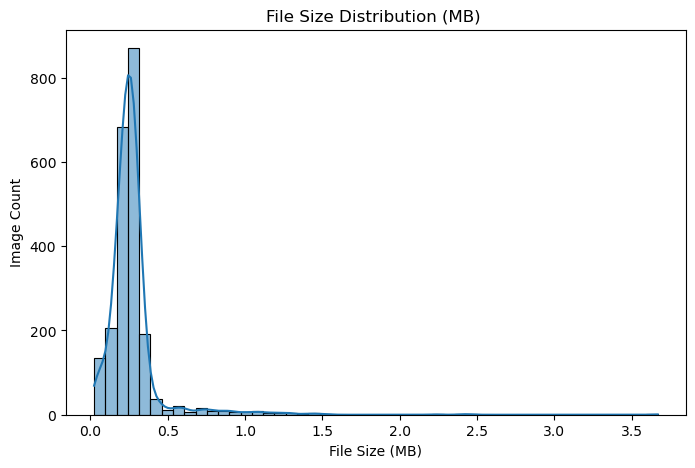

In [14]:
# 1.3. Analysis of Data Characteristics

# Select a random sample image path
sample_image_path = train_df['path'].iloc[0]

try:
    img_rgb = cv2.imread(sample_image_path)
    
    # OpenCV reads BGR, convert to RGB for visualization
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) 
    
    # Analyze image resolution (height-width)
    height, width, channels = img_rgb.shape
    
    print(f'Resolution (Height x Width): {height} x {width}\n{50*'*'}')
    
    # Verify the number of channels (RGB or grayscale?) 
    print(f'Channel Count Verification: {channels} (RGB, 3 channels)\n{50*'*'}')

    # Examine the file size distribution
    file_sizes = [os.path.getsize(path) for path in train_df['path']]
    
    print(f"File Size (MB):")
    print(f"  - Minimum: {np.min(file_sizes) / (1024*1024):.2f} MB")
    print(f"  - Maximum: {np.max(file_sizes) / (1024*1024):.2f} MB")
    print(f"  - Average: {np.mean(file_sizes) / (1024*1024):.2f} MB")

    plt.figure(figsize=(8, 5))
    sns.histplot([s / (1024*1024) for s in file_sizes], bins=50, kde=True)
    plt.title('File Size Distribution (MB) ')
    plt.xlabel('File Size (MB)')
    plt.ylabel('Image Count')
    plt.show()

except Exception as error:
    print(f"Error: Could not load or process the sample image. Check your file path settings. Error: {error}")

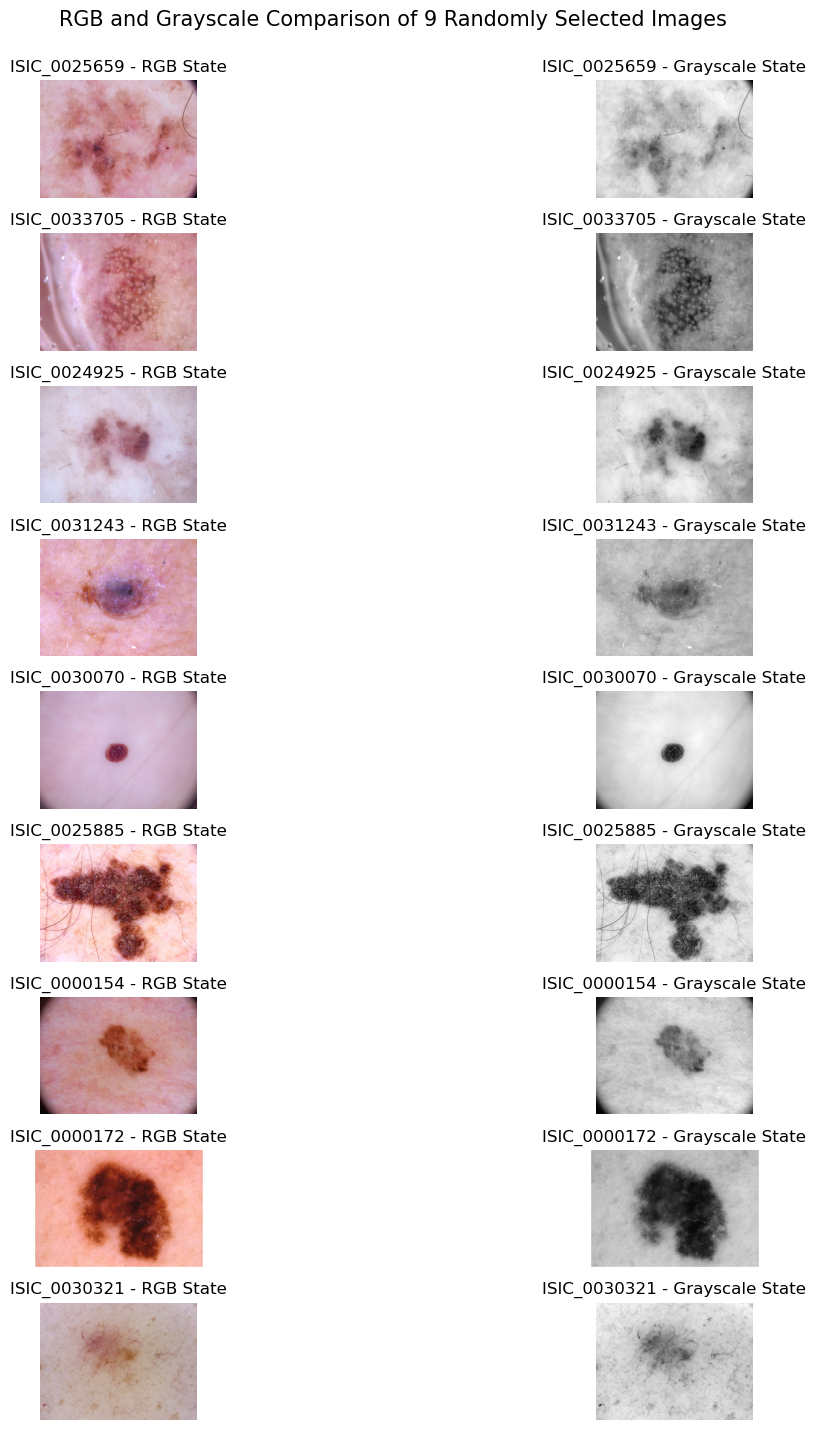

In [16]:
# 2. Image Uploading and Visualization
# 2.1. Randomly Selecting Images

random_samples = train_df.sample(n=9, random_state=42) 

plt.figure(figsize=(15, 15))
for i, row in enumerate(random_samples.itertuples()):
    img_path = row.path
    img_bgr = cv2.imread(img_path)
    
    if img_bgr is None:
        print(f'WARNING: Failed to load {img_path}.')
        continue
        
    # Convert to RGB for correct display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Convert to Grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # RGB Image Display (First Column)
    plt.subplot(9, 2, i*2 + 1)
    plt.imshow(img_rgb)
    plt.title(f"{row.image_id} - RGB State")
    plt.axis('off')
    
    # Grayscale Image Display (Second Column)
    plt.subplot(9, 2, i*2 + 2)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f'{row.image_id} - Grayscale State')
    plt.axis('off')

plt.suptitle("RGB and Grayscale Comparison of 9 Randomly Selected Images ", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [19]:
# 2.2. Statistical Properties of Random Images

random_row = train_df.sample(n=1, random_state=10).iloc[0]
img_path = random_row.path
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def get_stats(image, name):
    
    min_val = np.min(image) 
    max_val = np.max(image) 
    mean_val = np.mean(image)
    std_val = np.std(image)
    
    return {
        'Image Format': name,
        'Minimum': f"{min_val:.2f}",
        'Maximum': f"{max_val:.2f}",
        'Mean': f"{mean_val:.2f}",
        'Standard Deviation': f"{std_val:.2f}"
    }

# RGB Statistics (Channel-Based)
r_stats = get_stats(img_rgb[:,:,0], 'RGB - Red')
g_stats = get_stats(img_rgb[:,:,1], 'RGB - Green')
b_stats = get_stats(img_rgb[:,:,2], 'RGB - Blue')

# Grayscale Statistics
gray_stats = get_stats(img_gray, 'Grayscale')

# Create a comparison table
stats_df = pd.DataFrame([r_stats, g_stats, b_stats, gray_stats])

print(f'{70*'*'}\n\tImage ID: {random_row.image_id} Statistical Comparison\n{70*'*'}')
print(stats_df.to_markdown(index=False))

**********************************************************************
	Image ID: ISIC_0027608 Statistical Comparison
**********************************************************************
| Image Format   |   Minimum |   Maximum |   Mean |   Standard Deviation |
|:---------------|----------:|----------:|-------:|---------------------:|
| RGB - Red      |        97 |       215 | 160.34 |                17.27 |
| RGB - Green    |        22 |       197 | 120.49 |                19.08 |
| RGB - Blue     |        37 |       250 | 141.99 |                24.62 |
| Grayscale      |        55 |       205 | 134.86 |                18.56 |


#### Comment: RGB vs. Grayscale statistics

* **Minimum/Maximum Values:** If the Min/Max values ​​are not close to 0 and 255, this indicates that the image is not using the full dynamic range (contrast) and may need to be contrasted.
* **Average Values:** The average of the channels indicates how bright and dominant that color is. The Grayscale average should be close to the weighted average of the RGB channels (usually green has the most weight).
* **Standard Deviation:** The standard deviation indicates the **range of contrast** (the spread of pixel values) in that channel or image. The higher it is, the greater the contrast.

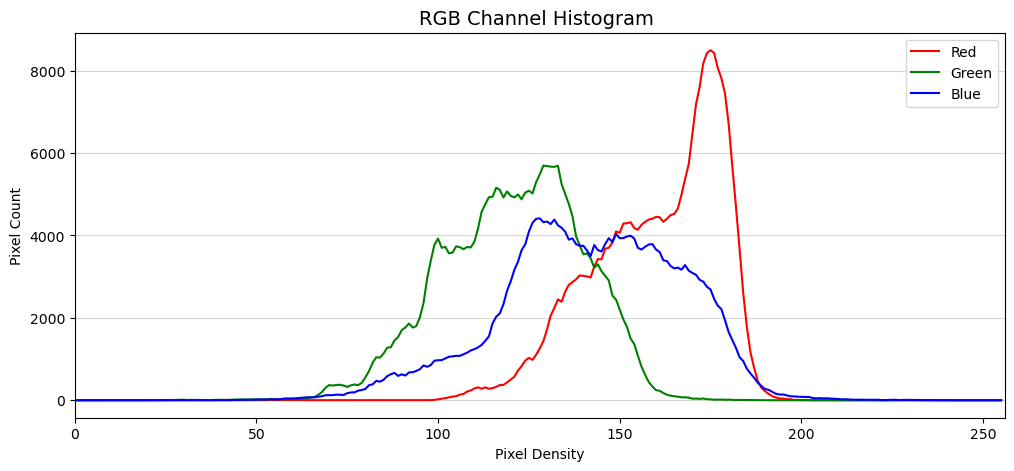

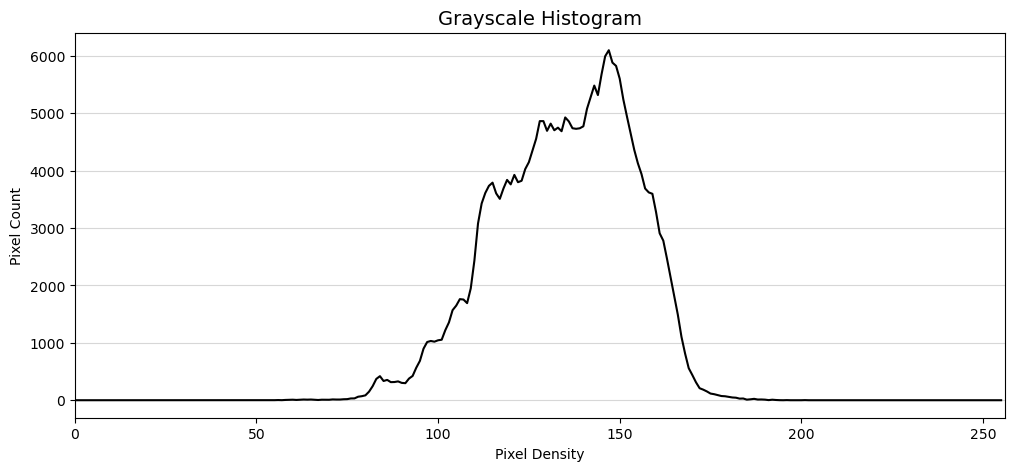

In [20]:
# 2.3 Histogram Drawing (Required – RGB + Grayscale)

# a) RGB Histogramı (R, G, B)
plt.figure(figsize=(12, 5))
colors = ('r', 'g', 'b')
plt.title('RGB Channel Histogram ', fontsize=14)
plt.xlabel('Pixel Density')
plt.ylabel('Pixel Count')

for i, col in enumerate(colors):
    
    # Draw a histogram for each channel
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256]) 
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
    
plt.legend(['Red', 'Green', 'Blue'])
plt.grid(axis='y', alpha=0.5)
plt.show()

# b) Grayscale Histogram (single channel)
plt.figure(figsize=(12, 5))
plt.title('Grayscale Histogram', fontsize=14) 
plt.xlabel('Pixel Density')
plt.ylabel('Pixel Count')

hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist_gray, color='black')
plt.xlim([0, 256])
plt.grid(axis='y', alpha=0.5)
plt.show()


#### Short Analysis (Comment):

* **How are the three channels in the RGB histogram separated from each other?** 
* Observe whether the peaks (Pixel Density) of the three channels are in different parts of the spectrum (e.g. R and G in the light part and B in the dark part). This indicates the dominant colors and how the light is distributed in the image.

* **What tones are concentrated in the Grayscale histogram?** 
* Observe whether the peak of the grayscale histogram is close to 0 (black) (dark image), close to 255 (white) (light image), or centered in the middle (low contrast).

* **Comment on the effect of the RGB → grayscale conversion on the histogram.**
* Converting to Grayscale merges the three color distributions into a single distribution (brightness). This makes the Grayscale histogram usually appear wider and flatter than either color channel alone.

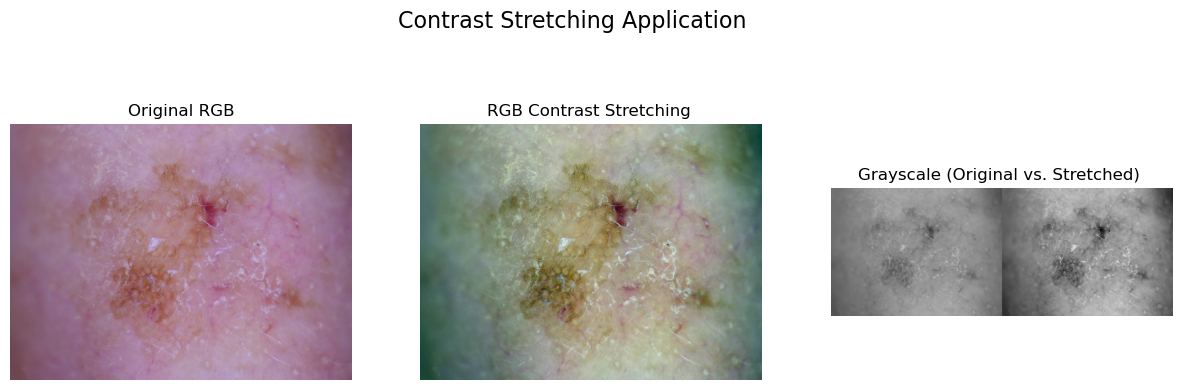

In [21]:
# 3. Image Processing and Enhancement
# 3.1. Contrast Stretching

def contrast_stretch(image):
    
    # Normalize pixel values to the 0-255 range
    min_val = np.min(image)
    max_val = np.max(image)
    
    if max_val == min_val:
        return image
    
    # Formula: New Value = (Old Value - Min) * (255 / (Max - Min))
    stretched = 255.0 * (image - min_val) / (max_val - min_val)
    return stretched.astype(np.uint8)

# Grayscale Stretching (Single channel stretching)
gray_stretched = contrast_stretch(img_gray.copy())

# RGB Stretching (Separately for each channel)
r_stretched = contrast_stretch(img_rgb[:,:,0])
g_stretched = contrast_stretch(img_rgb[:,:,1])
b_stretched = contrast_stretch(img_rgb[:,:,2])

# Merge the stretched channels back into an RGB image
rgb_stretched = cv2.merge([r_stretched, g_stretched, b_stretched])

# Compare the resulting images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original RGB')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_stretched)
plt.title('RGB Contrast Stretching ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.hstack((img_gray, gray_stretched)), cmap='gray')
plt.title('Grayscale (Original vs. Stretched) ')
plt.axis('off')
plt.suptitle("Contrast Stretching Application", fontsize=16)
plt.show()

#### Comment: Contrast Stretching Comparison

* **Grayscale:** Contrast stretching effectively increases the **dynamic range** and **overall contrast** by utilizing the full 0-255 intensity range. This often makes details in both bright and dark regions more apparent.
* **RGB:** Applying stretching channel-wise (R, G, and B separately) maximizes the contrast within each primary color. This generally leads to **more vivid colors** and improved overall contrast in the colored image.


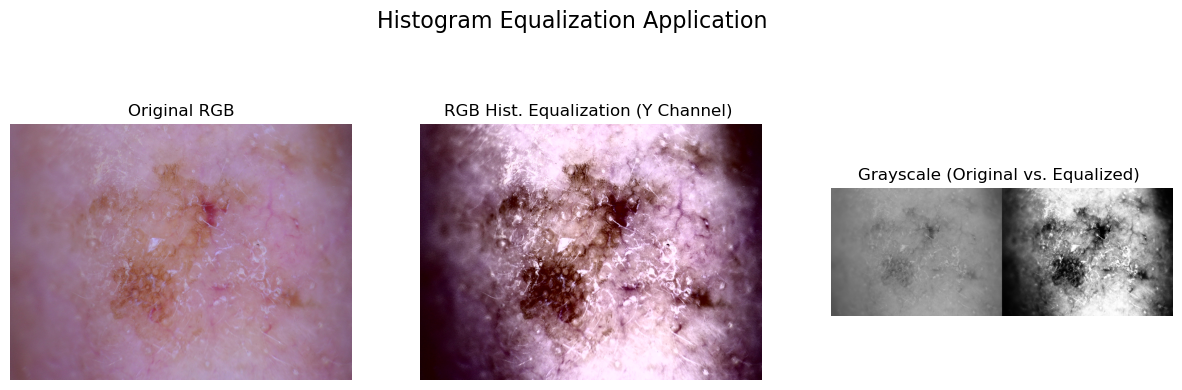

In [22]:
# 3.2. Histogram Equalization

# Grayscale: Apply histogram equalization directly
gray_equalized = cv2.equalizeHist(img_gray)

# RGB: Using YCrCb for Color Preservation
# 1. Convert RGB to YCrCb (Y: Luminance, Cr/Cb: Chrominance)
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

# 2. Split Y, Cr, Cb channels
Y, Cr, Cb = cv2.split(img_ycrcb)

# 3. Equalize ONLY the Y (Luminance) channel 
Y_equalized = cv2.equalizeHist(Y)

# 4. Merge the equalized Y with original Cr and Cb channels
img_ycrcb_equalized = cv2.merge([Y_equalized, Cr, Cb])

# 5. Convert back to RGB
rgb_equalized = cv2.cvtColor(img_ycrcb_equalized, cv2.COLOR_YCrCb2RGB)

# Compare the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original RGB')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_equalized)
plt.title('RGB Hist. Equalization (Y Channel) ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.hstack((img_gray, gray_equalized)), cmap='gray')
plt.title('Grayscale (Original vs. Equalized) ')
plt.axis('off')
plt.suptitle("Histogram Equalization Application", fontsize=16)
plt.show()


#### Comment: Histogram Equalization

* **Grayscale:** Direct equalization generally results in a significant boost in **local and global contrast**. However, it can sometimes introduce **artifacts** or unnaturally emphasize noise because it forces the histogram to be uniform, regardless of the original content.
* **RGB (YCrCb):** Equalizing the Luminance (Y) channel only is the standard practice for color images. This method effectively improves the image's perceived contrast and brightness while **preserving the original color integrity** (Chroma/CrCb), preventing the severe color shifts that occur if R, G, and B channels are equalized separately.


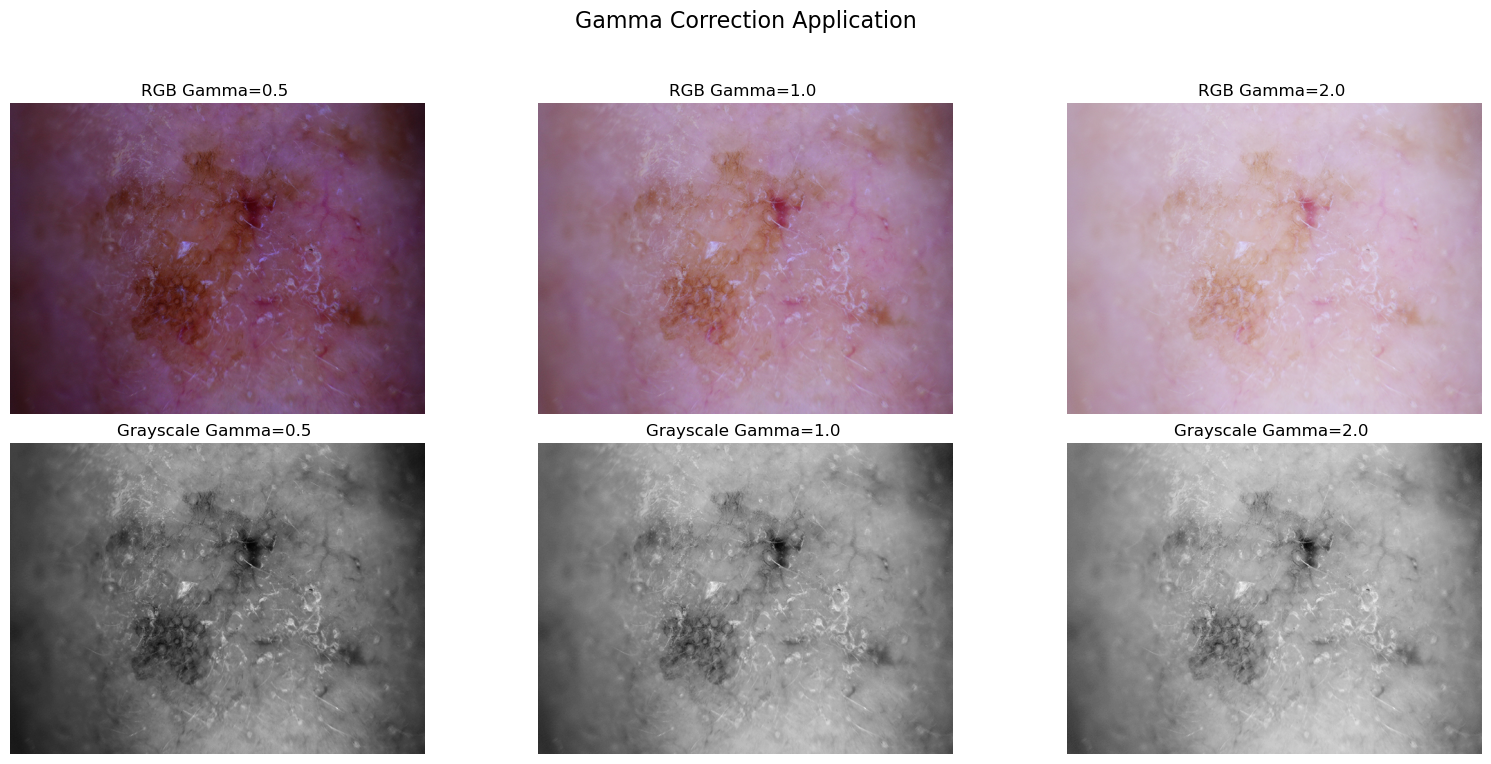

In [23]:
# 3.3. Gamma Correction

def gamma_correction(image, gamma):
    
    # Gamma correction formula: O = I^(1/gamma) * 255
    inv_gamma = 1.0 / gamma
    
    # Create a look-up table (LUT)
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    
    # Apply the LUT to the image
    return cv2.LUT(image, table)

gamma_values = [0.5, 1.0, 2.0] # Different gamma values to apply 

plt.figure(figsize=(16, 8))

# For RGB
for i, gamma in enumerate(gamma_values):
    rgb_corrected = gamma_correction(img_rgb, gamma)
    
    plt.subplot(2, len(gamma_values), i + 1)
    plt.imshow(rgb_corrected)
    plt.title(f'RGB Gamma={gamma} ')
    plt.axis('off')

# For Grayscale
for i, gamma in enumerate(gamma_values):
    gray_corrected = gamma_correction(img_gray, gamma)
    
    plt.subplot(2, len(gamma_values), len(gamma_values) + i + 1)
    plt.imshow(gray_corrected, cmap='gray')
    plt.title(f'Grayscale Gamma={gamma} ')
    plt.axis('off')

plt.suptitle("Gamma Correction Application", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Comment: Gamma Correction

* **Observation of Brightness Changes:**
    * **$\gamma < 1.0$ (e.g., 0.5):** The image becomes **brighter**. This operation stretches the dark/shadow regions, making details more visible in darker areas.
    * **$\gamma = 1.0$:** The image remains unchanged (linear transformation).
    * **$\gamma > 1.0$ (e.g., 2.0):** The image becomes **darker**. This compresses the bright regions and can help tame overexposed highlights.
* **Effect on Image Quality:**
    * Gamma correction is a powerful tool to selectively adjust the contrast in different tonal ranges without severe global changes. It often improves image quality by revealing details hidden in shadows or highlights, which is crucial for medical image analysis.

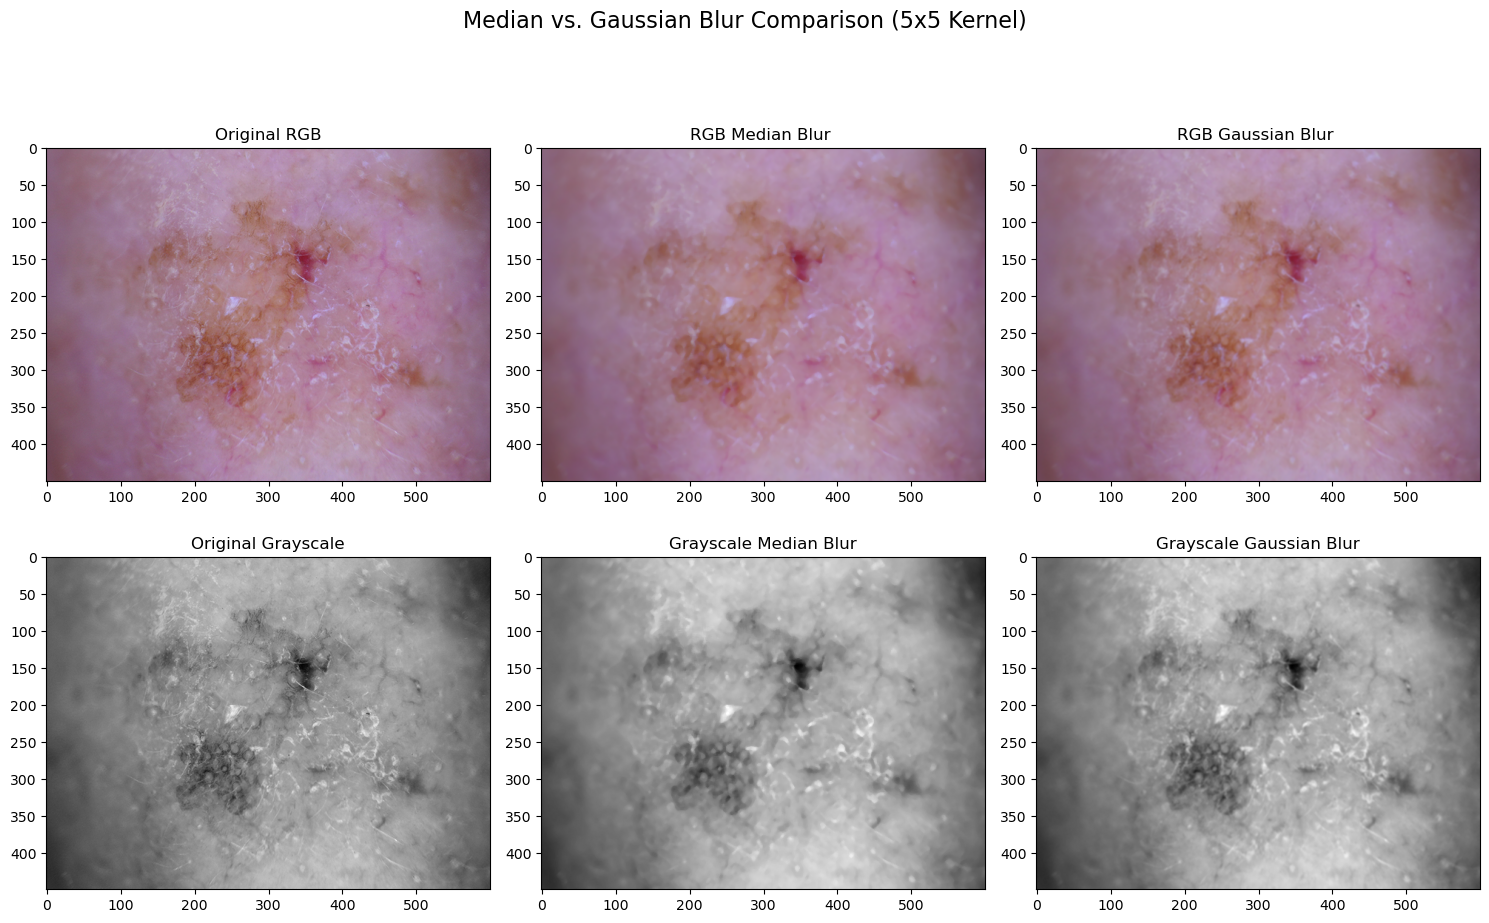

In [24]:
# 4. Noise Reduction

kernel_size = 5 # Must be an odd number

# 4.1. Apply Median Blur
rgb_median = cv2.medianBlur(img_rgb, kernel_size)
gray_median = cv2.medianBlur(img_gray, kernel_size)

# 4.2. Apply Gaussian Blur
rgb_gaussian = cv2.GaussianBlur(img_rgb, (kernel_size, kernel_size), 0) 
gray_gaussian = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)

# Visualization and Comparison
plt.figure(figsize=(15, 10))

# RGB Comparison
plt.subplot(2, 3, 1), plt.imshow(img_rgb), plt.title('Original RGB')
plt.subplot(2, 3, 2), plt.imshow(rgb_median), plt.title('RGB Median Blur ')
plt.subplot(2, 3, 3), plt.imshow(rgb_gaussian), plt.title('RGB Gaussian Blur ')

# Grayscale Comparison
plt.subplot(2, 3, 4), plt.imshow(img_gray, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(2, 3, 5), plt.imshow(gray_median, cmap='gray'), plt.title('Grayscale Median Blur')
plt.subplot(2, 3, 6), plt.imshow(gray_gaussian, cmap='gray'), plt.title('Grayscale Gaussian Blur')

plt.suptitle(f"Median vs. Gaussian Blur Comparison ({kernel_size}x{kernel_size} Kernel)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Comment: Median vs. Gaussian Blur Comparison

* **Does Median blur preserve edges better?** 
    * **Yes, Median blur preserves edges better.** Because it replaces the pixel with the median value of its neighborhood, it is excellent at removing **salt-and-pepper noise** (outliers) without significantly blurring sharp discontinuities (edges).
    
* **Does Gaussian blur cause detail loss?** 
    * **Yes, Gaussian blur causes detail loss.** It uses a weighted average across the neighborhood, which inevitably softens edges and fine textures by reducing high-frequency components. This is effective for removing **Gaussian noise** but at the cost of detail.

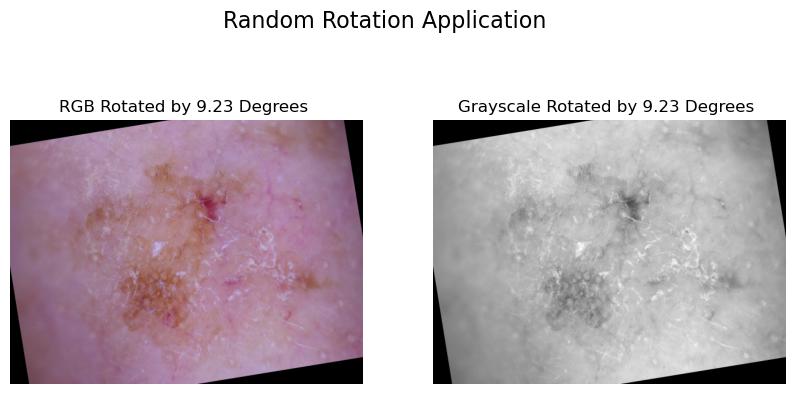

In [25]:
# 5. Rotation and Mirror Flipping
# 5.1. Random Rotation

# Rotate at a random angle between 0 and 10 degrees
angle = random.uniform(0, 10) 

# Get image dimensions
(h, w) = img_rgb.shape[:2]

# Center point
center = (w // 2, h // 2)

# Get the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Rotate RGB and grayscale images separately 
rgb_rotated = cv2.warpAffine(img_rgb, M, (w, h))
gray_rotated = cv2.warpAffine(img_gray, M, (w, h))

# Visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_rotated)
plt.title(f'RGB Rotated by {angle:.2f} Degrees ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_rotated, cmap='gray')
plt.title(f'Grayscale Rotated by {angle:.2f} Degrees ')
plt.axis('off')

plt.suptitle("Random Rotation Application", fontsize=16)
plt.show()

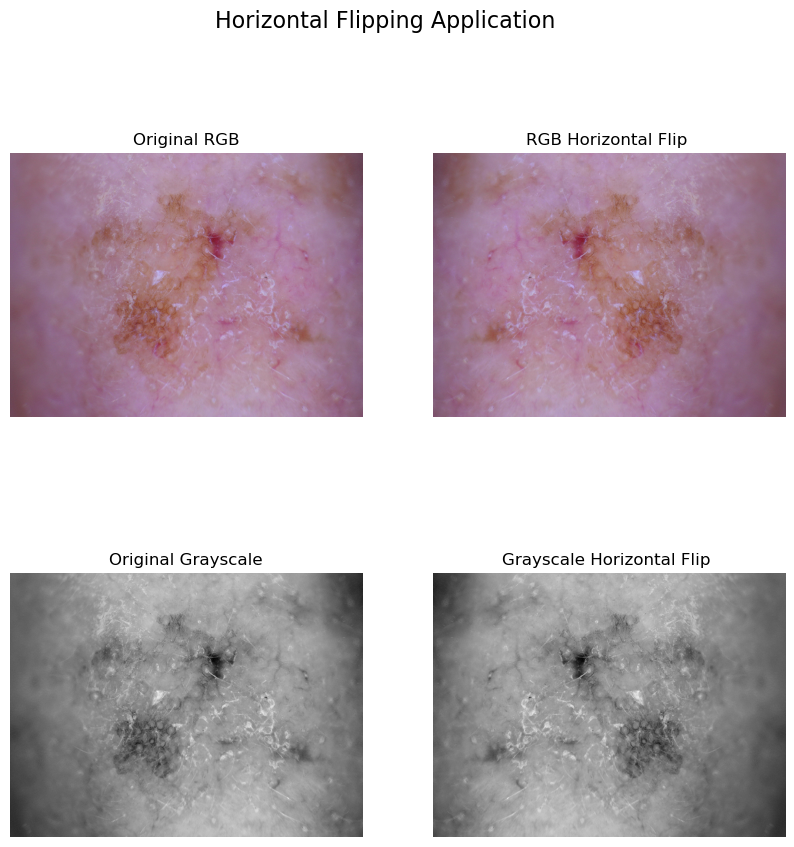

In [26]:
# 5.2. Horizontal Flipping

# Apply horizontal flip to both formats
rgb_flipped = cv2.flip(img_rgb, 1) 
gray_flipped = cv2.flip(img_gray, 1) 

# Visualization
plt.figure(figsize=(10, 10))

# RGB Comparison
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original RGB')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rgb_flipped)
plt.title('RGB Horizontal Flip ')
plt.axis('off')

# Grayscale Comparison
plt.subplot(2, 2, 3)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gray_flipped, cmap='gray')
plt.title('Grayscale Horizontal Flip ')
plt.axis('off')

plt.suptitle("Horizontal Flipping Application", fontsize=16)
plt.show()


#### Comment: Observation of Symmetry Differences

* Horizontal flipping reverses the image along the vertical axis, swapping the left and right sides.
* **Symmetry Differences:** By observing the original versus the flipped image, we can visually assess the **symmetry** of the skin lesion. Most lesions are not perfectly symmetrical. The flip highlights any asymmetry in shape, color distribution, and border irregularity (ABCDE features in dermatology), as the left-side features are now on the right, and vice-versa.

C:\Users\vraja\AppData\Local\Temp\ipykernel_33340\2794904081.py:35: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered))


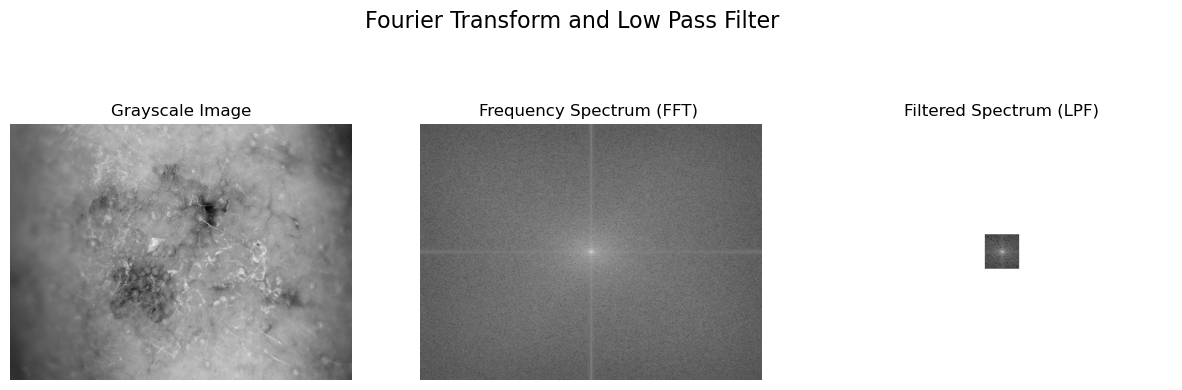

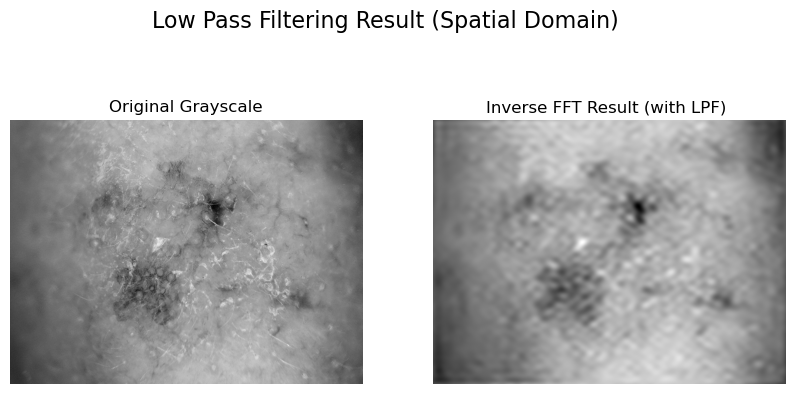

In [27]:
# 6. Frequency Domain Filtering (FFT)
# Grayscale image is used directly for FFT 
f = np.fft.fft2(img_gray)

# 6.1. Fourier Transform and Visualization of the Frequency Spectrum
# Shift the zero-frequency component to the center
fshift = np.fft.fftshift(f) 

# Calculate the magnitude spectrum and use logarithmic scaling
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum (FFT) ')
plt.axis('off')

# 6.2. Applying a Low Pass Filter (LPF)
rows, cols = img_gray.shape
crow, ccol = rows // 2 , cols // 2

# Create a mask 
mask_size = 30
mask = np.zeros((rows, cols), np.uint8)
mask[crow - mask_size:crow + mask_size, ccol - mask_size:ccol + mask_size] = 1

# Apply the mask to the frequency space
fshift_filtered = fshift * mask

# Visualize the filtered spectrum
magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered))

plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Filtered Spectrum (LPF)')
plt.axis('off')
plt.suptitle("Fourier Transform and Low Pass Filter", fontsize=16)
plt.show()

# 6.3. Inverse Fourier Transform (IFFT)
# Inverse shift
f_ishift = np.fft.ifftshift(fshift_filtered)

# Apply Inverse FFT
img_back = np.fft.ifft2(f_ishift)

# Take the magnitude (real part) of the result
img_back = np.abs(img_back)

# Visualize the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original Grayscale')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Inverse FFT Result (with LPF) ')
plt.axis('off')
plt.suptitle("Low Pass Filtering Result (Spatial Domain)", fontsize=16)
plt.show()


#### Comment: Comparison of FFT Results and Grayscale

* **FFT Spectrum Analysis:** The center of the spectrum represents **low frequencies** (slowly changing intensity, image outlines). The outer areas represent **high frequencies** (sharp edges, details, and noise).
* **Effect of LPF:** By applying the Low Pass Filter (LPF), we block the high frequencies, preserving only the low-frequency components.
* **IFFT Result:** The image reconstructed via the Inverse FFT is **blurred** compared to the original grayscale image. This is because the LPF successfully removed the high-frequency information, which corresponds to the sharp details and edges in the spatial domain. The result is similar to Gaussian smoothing but achieved through frequency manipulation.
 

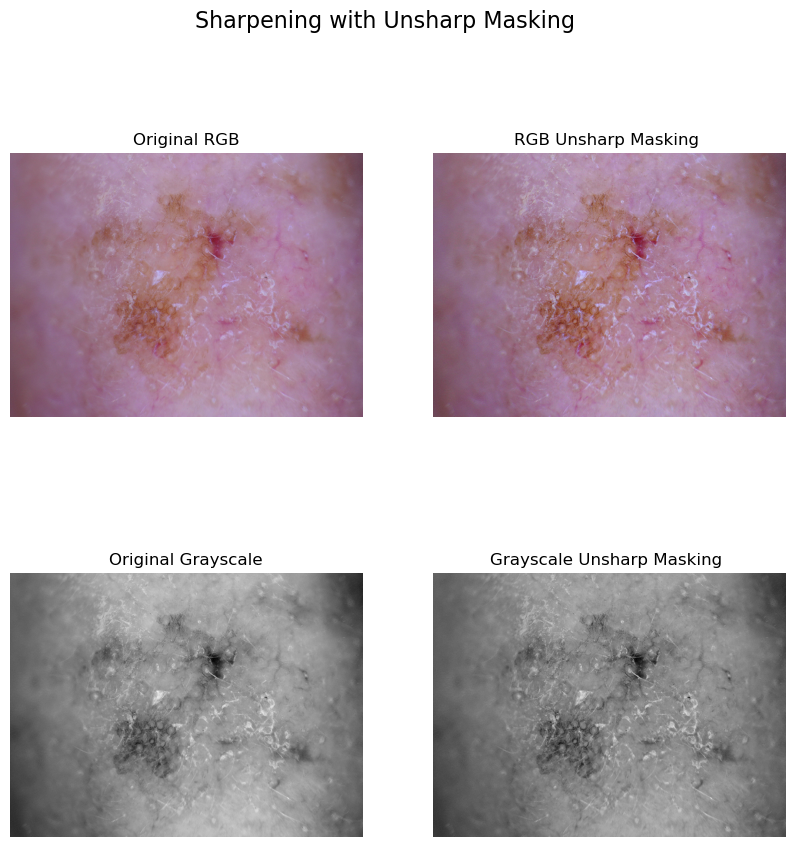

In [28]:
# 7. Keskinleştirme ve Enterpolasyon
# 7.1. Sharpening with Unsharp Masking

# Unsharp Masking = Original Image + (Original Image - Blurred Image) * Amount

# Grayscale Sharpening
# Create a blurred version (mask)
gray_blurred = cv2.GaussianBlur(img_gray, (0, 0), 5) 

# Apply the sharpening: Original * 1.5 + Blurred * -0.5 (A good starting point)
gray_unsharp = cv2.addWeighted(img_gray, 1.5, gray_blurred, -0.5, 0)

# RGB Sharpening
rgb_blurred = cv2.GaussianBlur(img_rgb, (0, 0), 5) 

# dst = alpha*src1 + beta*src2 + gamma
rgb_unsharp = cv2.addWeighted(img_rgb, 1.5, rgb_blurred, -0.5, 0) 

# Visualization and Comparison 
plt.figure(figsize=(10, 10))

# RGB Comparison
plt.subplot(2, 2, 1), plt.imshow(img_rgb), plt.title('Original RGB')
plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(rgb_unsharp), plt.title('RGB Unsharp Masking ')
plt.axis('off')

# Grayscale Comparison
plt.subplot(2, 2, 3), plt.imshow(img_gray, cmap='gray'), plt.title('Original Grayscale')
plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(gray_unsharp, cmap='gray'), plt.title('Grayscale Unsharp Masking ')
plt.axis('off')

plt.suptitle("Sharpening with Unsharp Masking", fontsize=16)
plt.show()


#### Comment: Sharpening Comparison

* **Effect:** Unsharp Masking effectively increases the **perceived sharpness** by enhancing the contrast along the edges and fine details in both RGB and Grayscale images.
* **Comparison:** The effect is fundamentally the same: edge contrast is boosted. However, the RGB version boosts contrast across all three color channels, while the Grayscale version only boosts the intensity contrast.


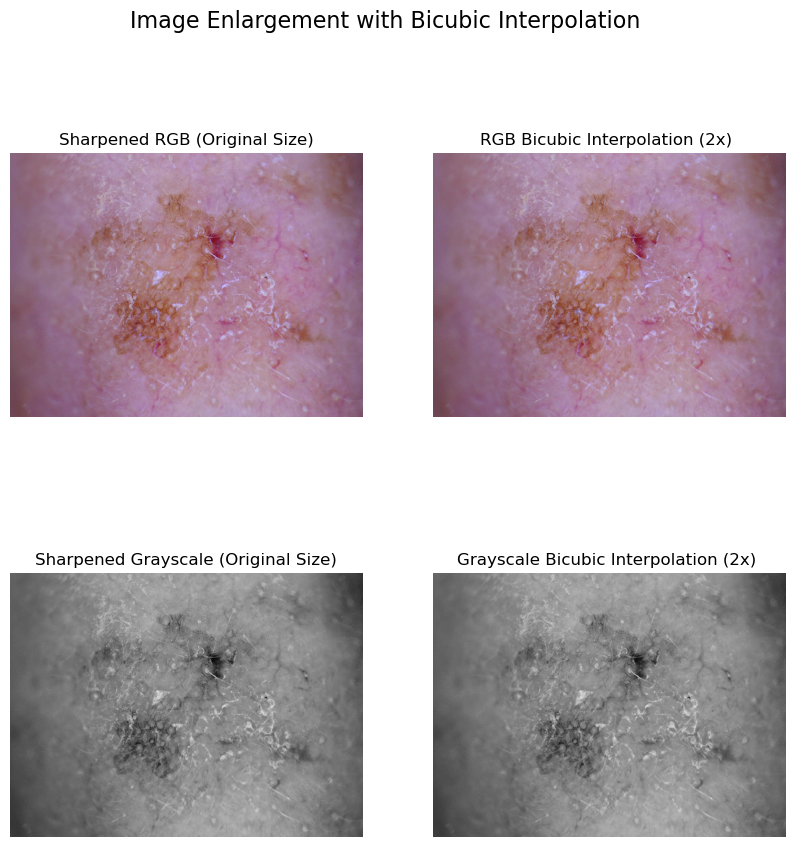

In [29]:
# 7.2. Bicubic Interpolation

scale_factor = 2 # Enlarge by 2 times

# Enlarge the sharpened RGB image 
(h_rgb, w_rgb) = rgb_unsharp.shape[:2]
rgb_enlarged = cv2.resize(rgb_unsharp, 
                          (w_rgb * scale_factor, h_rgb * scale_factor), 
                          interpolation=cv2.INTER_CUBIC) # Bicubic interpolation

# Enlarge the sharpened Grayscale image 
(h_gray, w_gray) = gray_unsharp.shape[:2]
gray_enlarged = cv2.resize(gray_unsharp, 
                           (w_gray * scale_factor, h_gray * scale_factor), 
                           interpolation=cv2.INTER_CUBIC)

# Visualization
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1), plt.imshow(rgb_unsharp), plt.title('Sharpened RGB (Original Size)')
plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(rgb_enlarged), plt.title('RGB Bicubic Interpolation (2x) ')
plt.axis('off')

plt.subplot(2, 2, 3), plt.imshow(gray_unsharp, cmap='gray'), plt.title('Sharpened Grayscale (Original Size)')
plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(gray_enlarged, cmap='gray'), plt.title('Grayscale Bicubic Interpolation (2x) ')
plt.axis('off')

plt.suptitle("Image Enlargement with Bicubic Interpolation", fontsize=16)
plt.show()


#### Comment: Quality After Interpolation

* **Bicubic Interpolation Quality:** Bicubic interpolation uses a $4 \times 4$ neighborhood of pixels to calculate new pixel values, fitting a cubic polynomial for smoother transitions. This method is generally considered superior to nearest-neighbor or bilinear interpolation, as it produces **sharper, less blocky results** and preserves details better during upscaling.
* **Effect of Pre-Sharpening:** Because the images were pre-sharpened with Unsharp Masking, the Bicubic interpolation has enhanced edge information to work with. The resulting enlarged images maintain good **visual quality** and preserve edge definition better than if the original (unsharpened) images were used.
